In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

### Natural Movie Stimulus
We'll load the `natural_movie_one` clip (900 frames, 30 seconds), and average the frames for every second as the average stimuli.

In [2]:
boc = BrainObservatoryCache()
data_set = boc.get_ophys_experiment_data(501498760)

# read in the natural movie one clip
movie = data_set.get_stimulus_template('natural_movie_one')

In [3]:
movie.shape

(900, 304, 608)

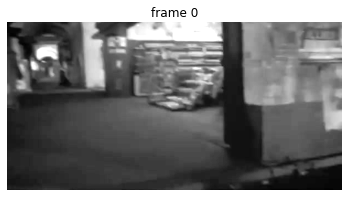

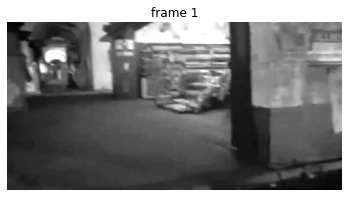

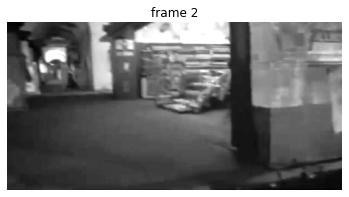

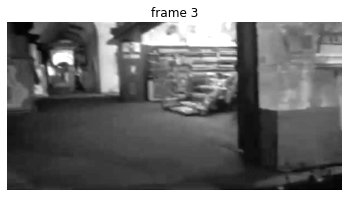

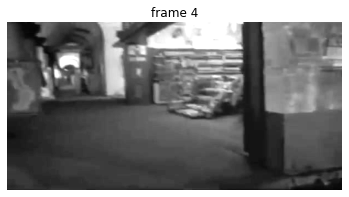

In [4]:
# display the starting frames for reference
for frame in range(5):
    plt.imshow(movie[frame,:,:], cmap='gray')
    plt.axis('off')
    plt.title('frame %d' % frame)
    plt.show()

#### Averaged Movie Stimuli

In [5]:
n_divs = 30
  
# calculates the average
movie_avg = np.mean(movie.reshape(
    movie.shape[0]//n_divs, n_divs, movie.shape[1], movie.shape[2]), 
    axis=1)

In [6]:
movie_avg.shape

(30, 304, 608)

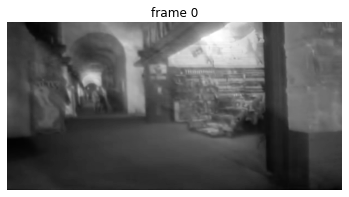

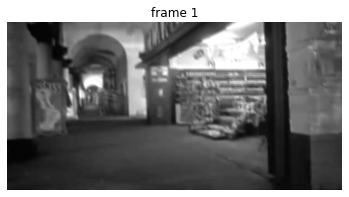

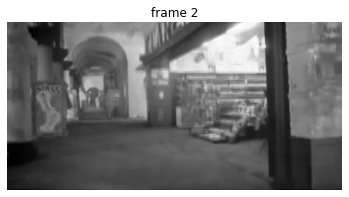

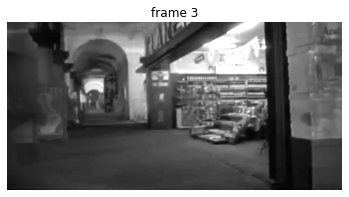

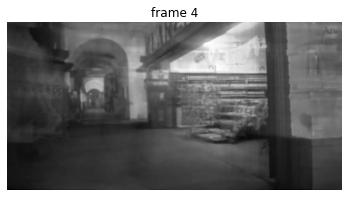

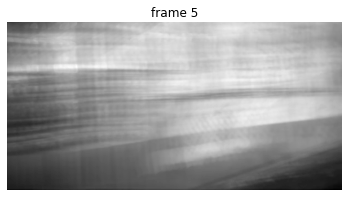

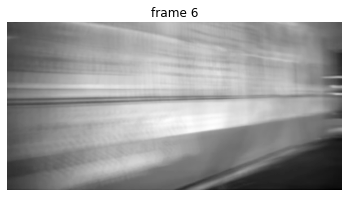

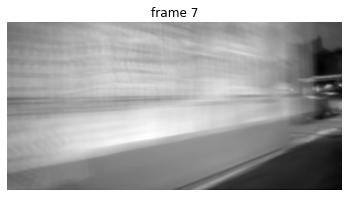

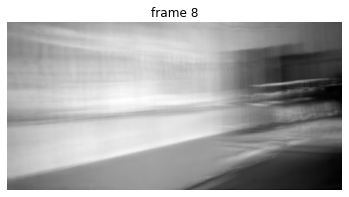

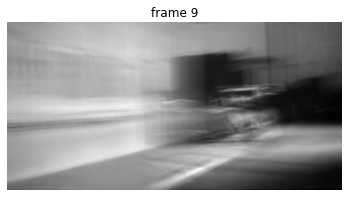

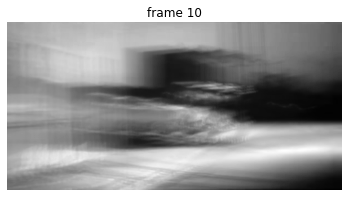

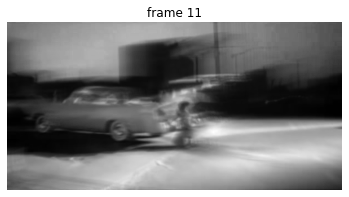

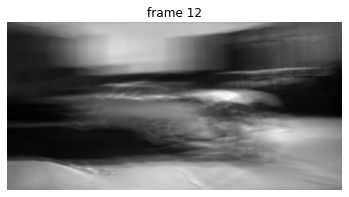

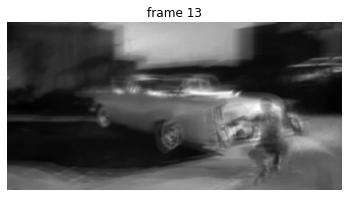

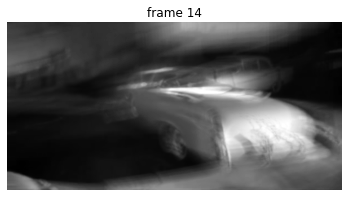

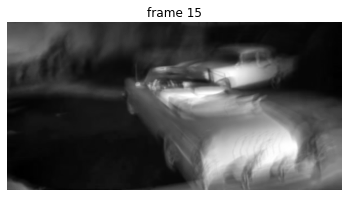

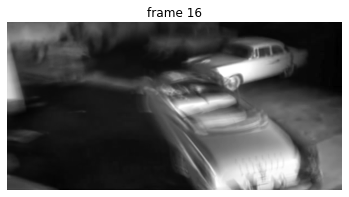

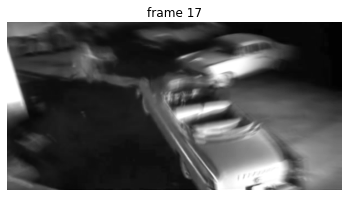

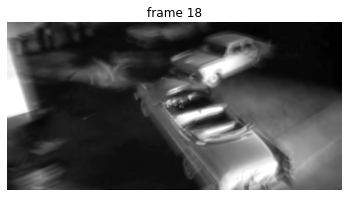

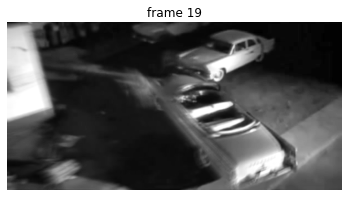

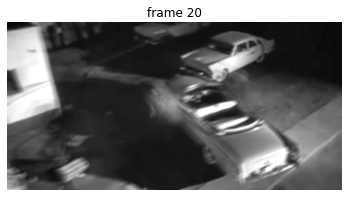

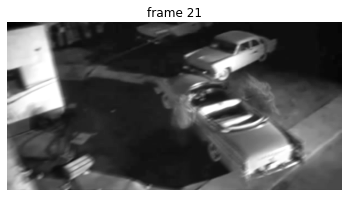

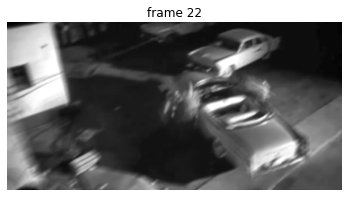

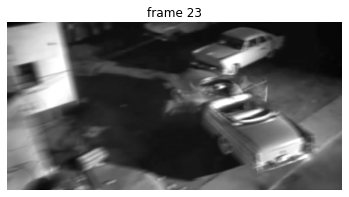

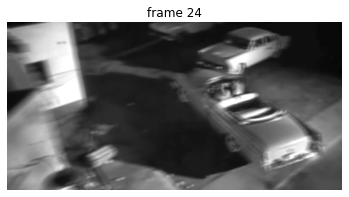

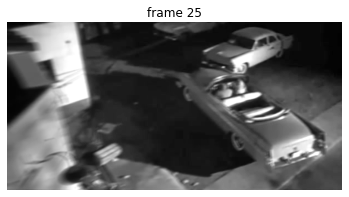

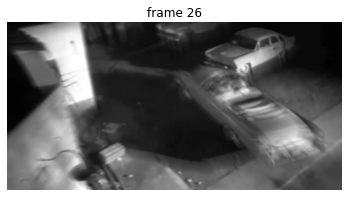

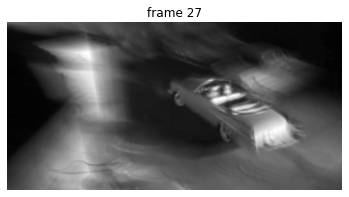

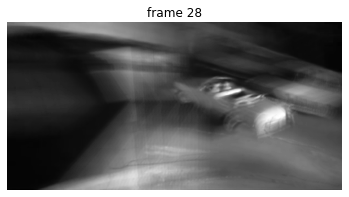

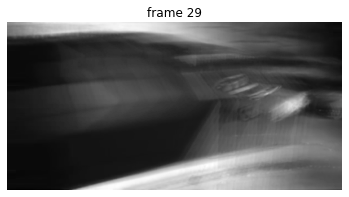

In [7]:
# display the averaged 30 stimuli: 
for frame in range(30):
    plt.imshow(movie_avg[frame,:,:], cmap='gray')
    plt.axis('off')
    plt.title('frame %d' % frame)
    # plt.savefig(f'averaged_frame_{frame}.pdf')
    plt.show()

#### Movie Pixel Correlation

In [8]:
movie_avg_vecs = movie_avg.reshape(30, -1)

In [9]:
movie_corr = np.corrcoef(movie_avg_vecs)

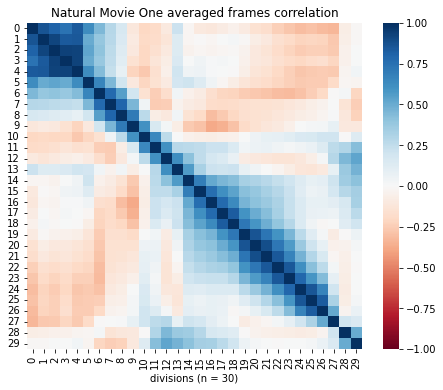

In [11]:
fig, ax = plt.subplots(figsize = (7.5,6))
sns.heatmap(movie_corr, 
            cmap = 'RdBu', vmin = -1, vmax = 1, ax = ax)
ax.set_title('Natural Movie One averaged frames correlation')
ax.set_xlabel('divisions (n = 30)')
# fig.savefig('movie_corr.pdf')
plt.show()